Objetive:

### 1. First Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set the style
plt.style.use("ggplot")
sns.set_theme()

In [3]:
# Load dataset
file_path = "../Data/downloaded/sorteos_export.csv"
df = pd.read_csv(file_path)

### 2. Explore The Data

In [4]:
# first lines of dataset
df.head(10)

,numero_sorteo,tipo_sorteo,fecha_sorteo,fecha_caducidad,primer_premio,segundo_premio,tercer_premio,reintegro_primer_premio,reintegro_segundo_premio,reintegro_tercer_premio
0,390,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
1,391,EXTRAORDINARIO,2024-07-21,2025-01-21,1095,96032,12592,5,2,2
2,392,EXTRAORDINARIO,2024-08-17,2025-02-17,78858,63023,28903,8,3,3
3,393,EXTRAORDINARIO,2024-09-21,2025-03-21,39647,65039,11627,7,9,7
4,394,EXTRAORDINARIO,2024-10-19,2025-04-21,59456,77229,59179,6,9,9
5,395,EXTRAORDINARIO,2024-11-23,2025-05-23,55049,77155,4765,9,5,5
6,3047,ORDINARIO,2024-06-15,2024-12-16,45100,74061,53248,0,1,8
7,3048,ORDINARIO,2024-06-22,2024-12-23,74569,47785,20555,9,5,5
8,3049,ORDINARIO,2024-06-29,2024-12-30,8241,29870,78927,1,0,7
9,3050,ORDINARIO,2024-07-06,2025-01-06,72487,10469,36580,7,9,0


In [5]:
# General information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   numero_sorteo             29 non-null     int64 
 1   tipo_sorteo               29 non-null     object
 2   fecha_sorteo              29 non-null     object
 3   fecha_caducidad           29 non-null     object
 4   primer_premio             29 non-null     int64 
 5   segundo_premio            29 non-null     int64 
 6   tercer_premio             29 non-null     int64 
 7   reintegro_primer_premio   29 non-null     int64 
 8   reintegro_segundo_premio  29 non-null     int64 
 9   reintegro_tercer_premio   29 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 2.4+ KB


In [6]:
# Statistics of dataset
df.describe()

,numero_sorteo,primer_premio,segundo_premio,tercer_premio,reintegro_primer_premio,reintegro_segundo_premio,reintegro_tercer_premio
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2506.517241,40867.413793,47803.758621,39474.275862,4.655172,4.793103,4.965517
std,1098.871292,24377.451705,25431.795264,26703.839355,2.991367,3.233522,2.872067
min,390.000000,967.000000,1964.000000,2569.000000,0.000000,0.000000,0.000000
25%,3048.000000,26598.000000,30143.000000,12592.000000,3.000000,2.000000,3.000000
50%,3055.000000,40310.000000,47785.000000,36580.000000,5.000000,4.000000,5.000000
75%,3062.000000,59537.000000,68678.000000,63469.000000,7.000000,8.000000,7.000000
max,3069.000000,78858.000000,96032.000000,79222.000000,9.000000,9.000000,9.000000


In [7]:
# null values per column
df.isnull().sum()

numero_sorteo               0
tipo_sorteo                 0
fecha_sorteo                0
fecha_caducidad             0
primer_premio               0
segundo_premio              0
tercer_premio               0
reintegro_primer_premio     0
reintegro_segundo_premio    0
reintegro_tercer_premio     0
dtype: int64

### 3. Top 10 Most Common Refunds (reintegros)

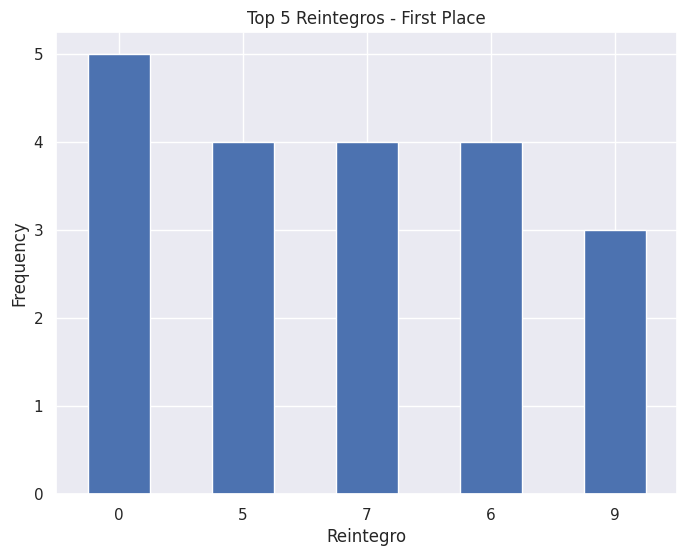

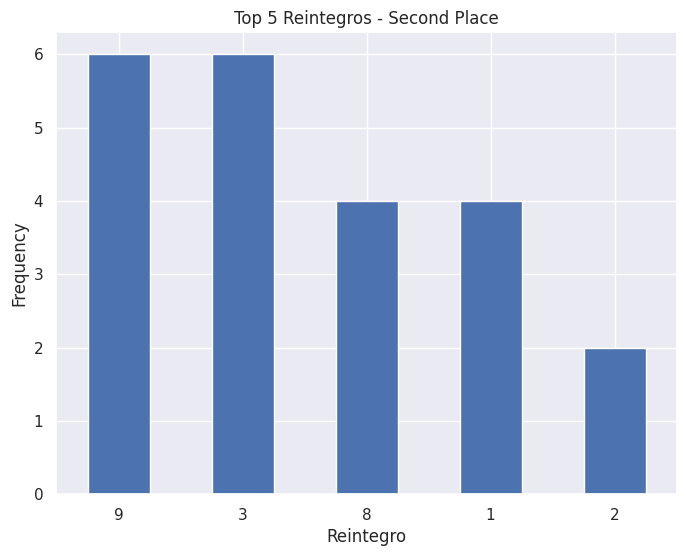

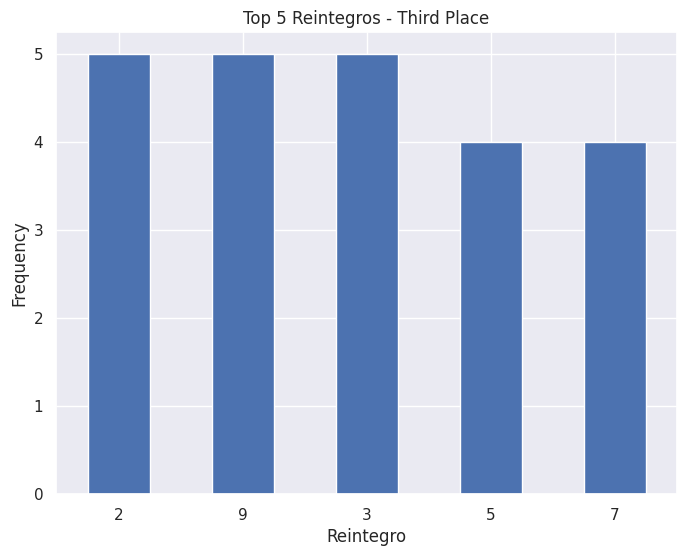

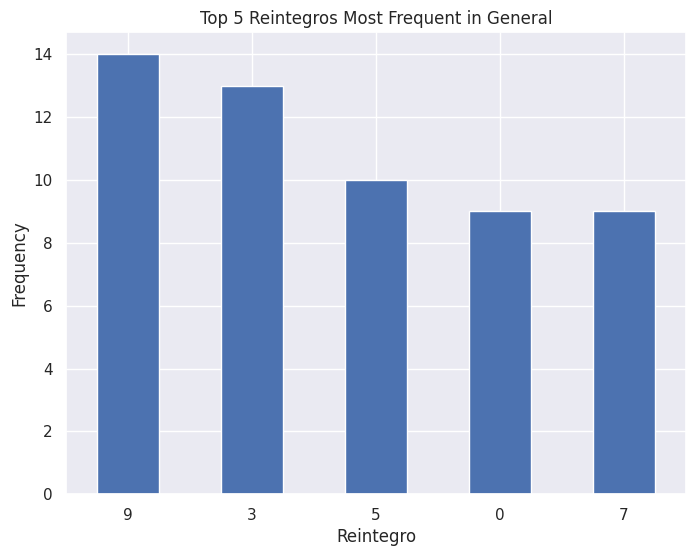

In [8]:
# Concatenate all "reintegros" in one single series for general analysis
all_reintegros = pd.concat([
    df['reintegro_primer_premio'],
    df['reintegro_segundo_premio'],
    df['reintegro_tercer_premio']
])

# Function for graph the top 5 for most frequent "reintegros"
def plot_top_5_reintegros(column_dataset, plot_title):
    top_5 = column_dataset.value_counts().head(5)
    plt.figure(figsize=(8, 6))
    top_5.plot(kind='bar')
    plt.title(plot_title)
    plt.xlabel('Reintegro')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.show()
    
plot_top_5_reintegros(df['reintegro_primer_premio'], 'Top 5 Reintegros - First Place')
plot_top_5_reintegros(df['reintegro_segundo_premio'], 'Top 5 Reintegros - Second Place')
plot_top_5_reintegros(df['reintegro_tercer_premio'], 'Top 5 Reintegros - Third Place')
plot_top_5_reintegros(all_reintegros, 'Top 5 Reintegros Most Frequent in General')

### 5. Distribution for the First, Second and Third place of the big winning numbers

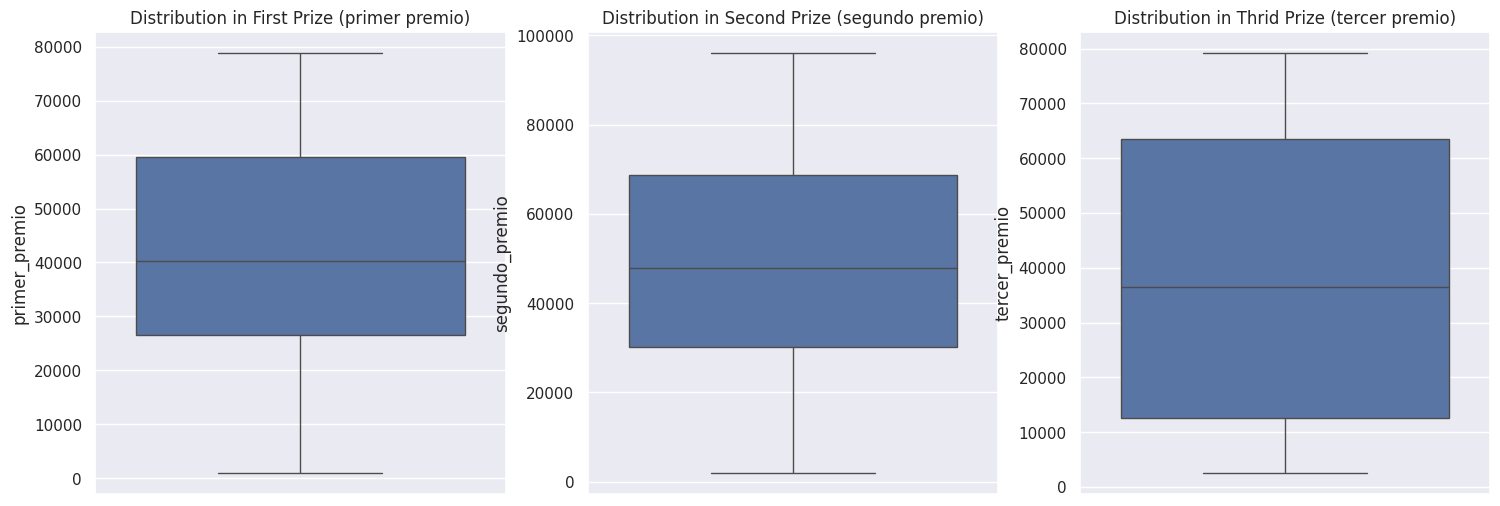

In [9]:
# Here will see what is the range for the winners of the first, second and third prize.
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=df['primer_premio'], ax=ax[0])
ax[0].set_title("Distribution in First Prize (primer premio)")

sns.boxplot(y=df['segundo_premio'], ax=ax[1])
ax[1].set_title("Distribution in Second Prize (segundo premio)")

sns.boxplot(y=df['tercer_premio'], ax=ax[2])
ax[2].set_title("Distribution in Thrid Prize (tercer premio)")

plt.show()